# Вариант 1

Ванифатов Кирилл ПИ20-5 Билет 50

1. Загрузить датасет в Python.



In [4]:
# импорт библиотек
import numpy as np
import pandas as pd

# загрузка данных из файла
data = pd.read_csv('mushrooms.csv')
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


2. Описать набор данных и решаемую задачу.


Необходимо решить задачу классификации по данным грибов и разбить выборку на 2 класса (смертельных и съедобных)

In [7]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Количество уникальных цветов шляпок грибов - 10

Самый популярный цвет жабр криба это - b (желтовато-коричневый)

Количество значений в столбце odor, как и во всей таблице - 8124, что говорит об отсутсвии пропусков в данных

In [8]:
data['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Количество элементов по уникальным значениям

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [14]:
data.shape

(8124, 23)

В датасете 8124 элемент и 23 признаков, включая целевой

3. Выделить целевую переменную и факторные переменные.


Целевая переменная - признак class. Факторные переменные - остальные признаки

In [17]:
data['class'].nunique()

2

In [18]:
# создаем 2 новых датафрейма
y = pd.DataFrame(data['class'])
x = pd.DataFrame(data.drop(['class'], axis=1))
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


4. Удалить ненужные данные, проанализировать отсутствующие значения.


Тяжело сказать, какие признаки являются лишними, мне кажется, что не стоит удалять их

In [20]:
# подсчет уникальных значений столбца
data['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

Проверка пропущенных значений

In [30]:
# Проверяем пропущенные значения
x.isna().sum(axis=0)

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

5. Прокомментировать количественные параметры датасета.


В датасете присутсвуют только категориальные параметры, поэтому можно посмотреть на их распределение

In [87]:
# импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt

По графику можно посмотреть распределение данных

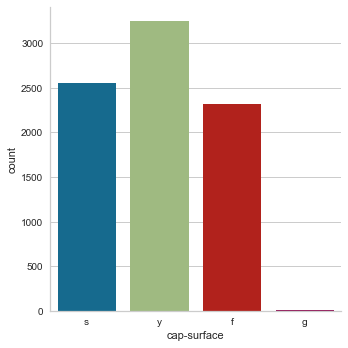

In [88]:
sns.catplot(data=data, x='cap-surface', kind="count"); 

В целом, кроме распределений, смотреть здесь особо нечего

6. Разбить выборку на обучающую и тестовую.


In [33]:
from sklearn.model_selection import train_test_split

# разбиение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% обучающей выборки

7. Работа по вариантам.


Вариант 1. Очистка данных и обучение моделей.
Данный вариант предполагает фокусировку на обучении нескольких видов моделей обучения с учителем. В зависимости от набора данных, может предполагаться задача классификации и регрессии. Необходимо после минимальной подготовки датасета к обучению обучить несколько моделей и сравнить их эффективность.


В датасете только категориальные признаки, поэтому необходима только one-hot кодировка

In [48]:
# one-hot кодировка для категориальных данных
x = pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
y = y.replace({'class':{'p':0, 'e':1}})
y.head()

,class
0,0
1,1
2,1
3,0
4,1


Предобработка была произведена выше

In [50]:
from sklearn.model_selection import train_test_split

# разбиение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% обучающей выборки

In [42]:
# создаем сводную таблицу метрик моделей
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP',
        'LinearDiscriminantAnalysis'
    ]
)


In [43]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

In [77]:
import time

def model_and_metrics(model):
    start = time.time() # точка отсчета времени
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)  
    end = time.time() - start # время работы программы
    returned = get_metrics(y_test, y_pred).append(pd.Series((end), index = ['time']))
    return returned

In [78]:
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия
model = LogisticRegression()
scores.iloc[0] = model_and_metrics(model)

In [80]:
from sklearn import svm

# Метод опорных векторов c ядром линейной функции
model = svm.SVC(kernel='linear')
scores.iloc[1] = model_and_metrics(model)

In [81]:
from sklearn import svm

# Метод опорных векторов c ядром радиальной базисной функции
model = svm.SVC(kernel='rbf')
scores.iloc[2] = model_and_metrics(model)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# k ближайших соседей
model = KNeighborsClassifier()
scores.iloc[3] = model_and_metrics(model)

In [83]:
from sklearn.neural_network import MLPClassifier

# Многоуровневый Перцептрон
model = MLPClassifier()
scores.iloc[4] = model_and_metrics(model)

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Линейный дискриминантный анализ
model = LinearDiscriminantAnalysis()
scores.iloc[5] = model_and_metrics(model)

После обучения моделей можно сравнить их качество и выделить лучшие

In [85]:
scores

,accuracy,precision,recall,f1_score,time
LogisticRegression,1.0,1.0,1.0,1.0,0.151347
SVC linear,1.0,1.0,1.0,1.0,0.2613
SVC gauss,1.0,1.0,1.0,1.0,1.352381
KNeighborsClassifier,1.0,1.0,1.0,1.0,0.424895
MLP,1.0,1.0,1.0,1.0,2.781626
LinearDiscriminantAnalysis,1.0,1.0,1.0,1.0,0.15957


#### ROC-кривые

In [68]:
!pip install yellowbrick

In [69]:
from yellowbrick.classifier import ROCAUC

def ROC_AUC(model):
    visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

    visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(x_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure

Грубо говоря, ROC кривая показывает процентное соотношение пар объектов, которая модель верно классифицировала. AOC - это площадь под графиком, в числовом формате говорящая о качестве

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


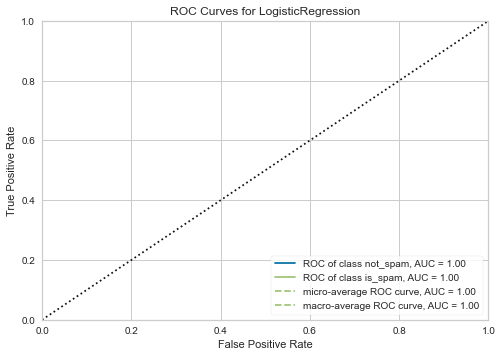

In [70]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
ROC_AUC(model)

#### precision-recall кривые

In [73]:
import matplotlib.pyplot as plt

from yellowbrick.classifier import PrecisionRecallCurve

def precision_recall(model):
    # Create the visualizer, fit, score, and show it
    viz = PrecisionRecallCurve(model)
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()

precision - точность TP/TP+FP = доля верно классифицированных объектов

recall - полнота TP/TP+FN = доля верно классифицированных объектов из всех

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


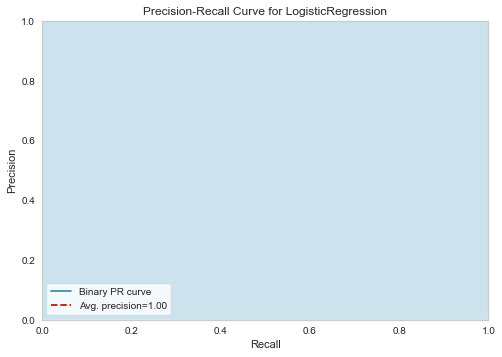

In [74]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
precision_recall(model)

#### Матрицы ошибок

In [86]:
from sklearn import metrics

model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)

array([[782,   0],
       [  0, 843]], dtype=int64)

[TP, FP, \
FN, TN]

- TP — true positive: классификатор верно отнёс объект к рассматриваемому классу.
- TN — true negative: классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
- FP — false positive: классификатор неверно отнёс объект к рассматриваемому классу.
- FN — false negative: классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

доля верно классификацированных объектов (recall) \
доля ошибочно классификацированных объектов (1-precision)

## Вывод

Можно сказать на примере Логистической регрессии, что наша модель переобучилась и идеально классифицирует данные